In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/'

/content/drive/MyDrive


Loading Libraries

In [3]:
#Import libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import MinMaxScaler
import os
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.metrics import mean_absolute_error, mean_squared_error



Loading the dataset


In [4]:
#Import dataset

df=pd.read_csv('tesla_stock_sentiment_data.csv')
df.head(5)




,Date,Sentiment,Open,High,Low,Close,Volume,RSI_14,SMA_20,EMA_20
0,2013-01-29,0.505748,2.540000,2.562667,2.475333,2.530000,21399000,73.639417,2.326000,2.326000
1,2013-01-30,0.505748,2.523333,2.533333,2.495333,2.501333,14521500,68.913398,2.338167,2.342698
2,2013-01-31,0.505748,2.524667,2.524667,2.462000,2.500667,13521000,68.802937,2.345333,2.357743
3,2013-02-01,0.505748,2.544667,2.566667,2.508000,2.553333,16509000,72.550435,2.357100,2.376371
4,2013-02-04,0.503098,2.560000,2.561333,2.506000,2.516000,16920000,66.456306,2.368233,2.389669


Cleaning The Dataset


In [5]:
# Identifying and imputing missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566 entries, 0 to 2565
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2566 non-null   object 
 1   Sentiment  2566 non-null   float64
 2   Open       2566 non-null   float64
 3   High       2566 non-null   float64
 4   Low        2566 non-null   float64
 5   Close      2566 non-null   float64
 6   Volume     2566 non-null   int64  
 7   RSI_14     2566 non-null   float64
 8   SMA_20     2566 non-null   float64
 9   EMA_20     2566 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 200.6+ KB


In [6]:
#Converting "Date" to date time format
df['Date']= pd.to_datetime(df.Date)
df.info()

#Changing the datetime to the index
df.set_index("Date" , inplace=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566 entries, 0 to 2565
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2566 non-null   datetime64[ns]
 1   Sentiment  2566 non-null   float64       
 2   Open       2566 non-null   float64       
 3   High       2566 non-null   float64       
 4   Low        2566 non-null   float64       
 5   Close      2566 non-null   float64       
 6   Volume     2566 non-null   int64         
 7   RSI_14     2566 non-null   float64       
 8   SMA_20     2566 non-null   float64       
 9   EMA_20     2566 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 200.6 KB


,Sentiment,Open,High,Low,Close,Volume,RSI_14,SMA_20,EMA_20
Date,,,,,,,,,
2013-01-29,0.505748,2.540000,2.562667,2.475333,2.530000,21399000,73.639417,2.326000,2.326000
2013-01-30,0.505748,2.523333,2.533333,2.495333,2.501333,14521500,68.913398,2.338167,2.342698
2013-01-31,0.505748,2.524667,2.524667,2.462000,2.500667,13521000,68.802937,2.345333,2.357743
2013-02-01,0.505748,2.544667,2.566667,2.508000,2.553333,16509000,72.550435,2.357100,2.376371
2013-02-04,0.503098,2.560000,2.561333,2.506000,2.516000,16920000,66.456306,2.368233,2.389669


In [7]:
# Describe the dataset
df.describe()

,Sentiment,Open,High,Low,Close,Volume,RSI_14,SMA_20,EMA_20
count,2.566000e+03,2566.000000,2566.000000,2566.000000,2566.000000,2.566000e+03,2566.000000,2566.000000,2566.000000
mean,4.812653e-01,76.271227,77.999208,74.379733,76.228911,1.142900e+08,53.511633,75.529150,75.532268
std,1.834081e-01,102.354803,104.724943,99.688868,102.231150,8.043563e+07,13.464896,101.664474,101.446634
min,8.940697e-08,2.294000,2.330667,2.253333,2.292000,6.603000e+06,16.564126,2.326000,2.326000
25%,3.956444e-01,14.677334,14.892334,14.443500,14.642666,6.429195e+07,43.916397,14.656833,14.723449
50%,4.997084e-01,19.705667,20.046667,19.269333,19.654667,9.100725e+07,52.383942,19.503267,19.712895
75%,5.450069e-01,127.190834,133.124172,123.604834,127.074165,1.356581e+08,63.019763,127.964300,130.806148
max,1.000000e+00,411.470001,414.496674,405.666656,409.970001,9.140820e+08,94.197983,373.152498,363.355837


Visualization


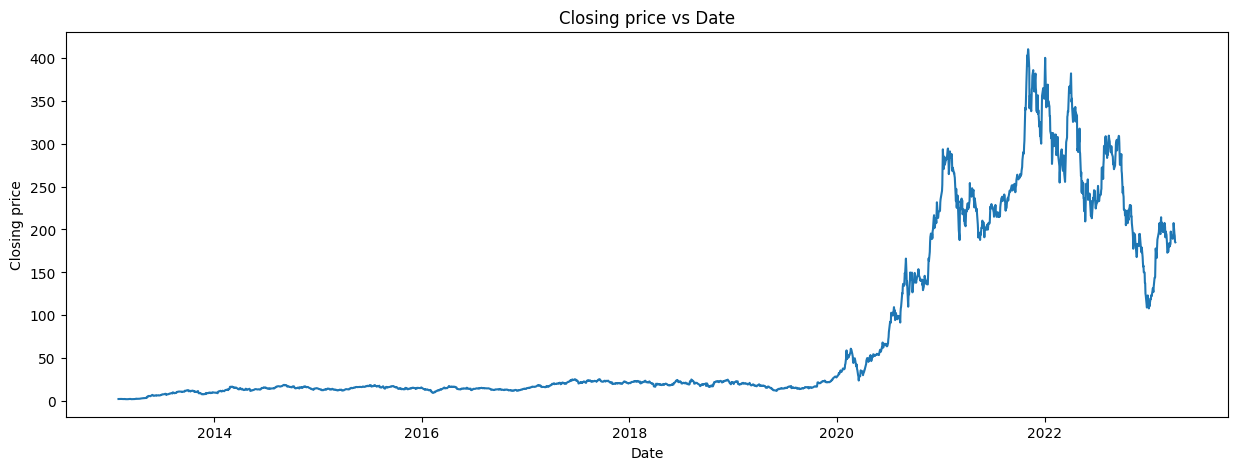

In [9]:
# Visualizing the data
# Simple plot
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.xlabel("Date")
plt.ylabel("Closing price")
plt.title('Closing price vs Date')


plt.show()

Data Preprocessing

In [10]:
#Creating a new dataframe with only the close column
target= df.filter(['Close']).values
features= df.drop('Close', axis=1).values



In [11]:
#Scale the data
scaler = MinMaxScaler(feature_range= (0,1))
features = scaler.fit_transform(features)



In [12]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,
                                                    test_size= 0.2,
                                                    random_state=0)

In [13]:

#Converting the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [14]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2052, 8, 1)

In [15]:
# Build the model
model = Sequential()
model.add(Dense(64, input_dim= x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer (1 neuron for regression)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')



In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit


# Define the number of splits (folds) for cross-validation
n_splits = 5
#Initialize TimeSeriesSplit for rolling cross-validation
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize lists to store performance metrics
mse_scores = []
predictions=[]

# Iterate over the folds
for train_index, test_index in tscv.split(features):
    x_train, x_test = features[train_index], features[test_index]
    y_train, y_test = target[train_index], target[test_index]

    # Train your ANN model on X_train and y_train
    # Make predictions on X_test
    # Calculate mean squared error for this fold
    # Append the MSE to mse_scores
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    mse_scores.append(mse)

# Calculate and print the average MSE across all folds
average_mse = np.mean(mse_scores)
print(f'Average Mean Squared Error: {average_mse}')


14/14 [==============================] - 0s 1ms/step
Average Mean Squared Error: 18.290210113873933


In [26]:
#Get the root mean squared error(RSME) and mean absolute error(MAE)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

rmse = np.sqrt( np.mean(predictions - y_test)** 2)
print("Root Mean Square Error", rmse)

Mean Absolute Error (MAE): 5.4070308783573635
Root Mean Square Error 0.8305143405458668


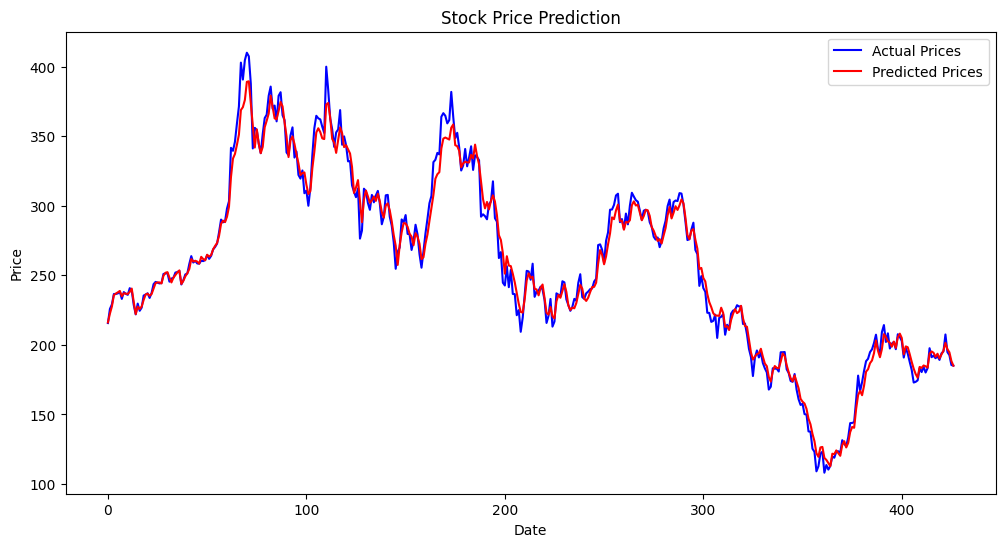

In [27]:
# Plot the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [28]:
validation= pd.DataFrame(y_test)
validation["Prediction"]= predictions
validation


,0,Prediction
0,215.660004,216.122757
1,225.783340,222.440903
2,229.066666,227.577728
3,236.556671,235.710983
4,236.580002,236.870575
...,...,...
422,207.460007,201.440582
423,194.770004,196.919769
424,192.580002,194.621368
425,185.520004,188.384460
